In [2]:
from torch.utils.tensorboard import SummaryWriter

In [5]:
import numpy as np
r = 6
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(100):
    writer.add_scalar("y=x", i**2, i)
    writer.add_scalars("y", {'xsinx':i*np.sin(i/r),
                            'xcosx':i*np.cos(i/r)},i)
writer.close()

In [98]:
def y_data(tmp_x):
    y = tmp_x**2 
    return y

from torch.utils.data import Dataset
from torch import  FloatTensor
class UserDataset(Dataset):
    def __init__(self, doc="dataset"):
        self.doc = doc
        x = list(range(0,100,3))
        self.x = torch.unsqueeze(FloatTensor(x), dim=1)
        y = list(map(y_data,x))
        self.y = torch.unsqueeze(FloatTensor(y), dim=1)
 
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [99]:
from torch.utils.data import DataLoader
user_dataset = UserDataset()
user_loader = DataLoader(user_dataset, batch_size=32, shuffle=True)

In [100]:
import torch.nn as nn
class reg_model(nn.Module):
    def __init__(self, in_dim, out_dim=1):
        super(reg_model, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.model = nn.Sequential(nn.Linear(in_dim, 16),nn.ReLU(),nn.Linear(16, out_dim))
        
    def forward(self,x):
        y = self.model(x)
        return y

In [110]:
from torch import optim
import torch
model = reg_model(1,1)
criterior = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(3000):
    for x, y in user_loader:
        optimizer.zero_grad()
        pred_y = model(x)
        loss = criterior(pred_y, y)
        loss.backward()
        optimizer.step()
        writer.add_scalar("train_loss", loss,i)
#     print(f"{i} loss is {loss}")

In [115]:
x = list(range(0,100))
y = list(map(y_data, x))
x = torch.unsqueeze(FloatTensor(x),dim=1)
model.eval()
with torch.no_grad():
    pred_y = model(x)

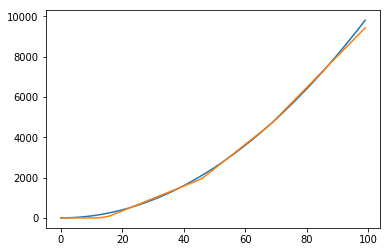

In [116]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x, pred_y.detach().numpy())